In [11]:
%load_ext autoreload
%autoreload 2

In [42]:
import shap
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from TreeModelsFromScratch.DecisionTree import DecisionTree
from TreeModelsFromScratch.RandomForest import RandomForest
from TreeModelsFromScratch.SmoothShap import verify_shap_model, smooth_shap, GridSearchCV_scratch, cross_val_score_scratch
import os
from datetime import datetime
import pickle

In [13]:
#load JS vis in the notebook for shap plots
shap.initjs() 

In [14]:
#for storing results
data_path = os.path.join(os.path.dirname(os.getcwd()),"data","strobl_simulation")
today_str = datetime.today().strftime("%Y%m%d")

In [5]:
# #Import Tree Models from scratch functions
# import sys
# import os

# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path+"/TreeModelsFromScratch")

# from DecisionTree import DecisionTree
# from RandomForest import RandomForest
# from SmoothShap import verify_shap_model, smooth_shap

# Development and testing of function

## Regression

In [6]:
X_dia, y_dia = datasets.load_diabetes(return_X_y=True, as_frame=True)

### Test of adapted HS formula for single Tree

In [43]:
# Instantiate tree
reg_tree = DecisionTree(max_depth=2, treetype="regression", HShrinkage=False, HS_lambda=0, random_state=42)
HSreg_tree = DecisionTree(max_depth=2, treetype="regression", HShrinkage=True, HS_lambda=10, random_state=42)

In [44]:
# fit trees
reg_tree.fit(X_dia, y_dia)
HSreg_tree.fit(X_dia, y_dia)

In [45]:
# Apply HS post hoc
reg_tree.HS_lambda = 10
reg_tree._apply_hierarchical_srinkage(treetype=reg_tree.treetype)
reg_tree._create_node_dict()

In [46]:
# create dummy list with smooth shap reg coef of 1 
smSHAP_coefs = [1.]*10

In [47]:
# reinstantiate and fit tree
reg_tree = DecisionTree(max_depth=2, treetype="regression", HShrinkage=False, HS_lambda=0, random_state=42)
reg_tree.fit(X_dia, y_dia)

In [48]:
[node.feature for node in reg_tree.node_list]

[8, 2, None, None, 2, None, None]

In [49]:
# Apply HS post hoc
reg_tree.HS_lambda = 10
reg_tree._apply_hierarchical_srinkage(treetype=reg_tree.treetype, smooth_shap_coefs=smSHAP_coefs)
reg_tree._create_node_dict()

In [50]:
HS_vals = [node.value for node in HSreg_tree.node_list]
reg_tree_vals = [node.value for node in reg_tree.node_list]

In [51]:
reg_tree_vals == HS_vals

True

In [52]:
# reinstantiate and fit tree
reg_tree = DecisionTree(max_depth=2, treetype="regression", HShrinkage=False, HS_lambda=0, random_state=42)
reg_tree.fit(X_dia, y_dia)

In [53]:
smSHAP_coefs[2]=0.6

In [55]:
# Apply HS post hoc
clf_tree.HS_lambda = 10
reg_tree._apply_hierarchical_srinkage(treetype=reg_tree.treetype, smooth_shap_coefs=smSHAP_coefs)
reg_tree._create_node_dict()

In [56]:
reg_tree_vals = [node.value for node in reg_tree.node_list]

In [57]:
reg_tree_vals

[152.13348416289594,
 127.40461349633752,
 114.32815407292517,
 174.98066799428452,
 176.19997436517153,
 147.03139198969262,
 207.52919247216738]

In [58]:
HS_vals

[152.13348416289594,
 110.9186997186319,
 97.84224029521955,
 158.49475421657888,
 192.24430116668862,
 163.07571879120968,
 223.57351927368447]

### Test of new formula for RF (post-hoc)

In [116]:
rf_reg = RandomForest(n_trees=25, treetype="regression", oob_SHAP=True, random_state=42)

In [117]:
rf_reg.fit(X_dia, y_dia)

In [118]:
from sklearn.metrics import mean_squared_error

In [119]:
mean_squared_error(y_dia, rf_reg.predict(X_dia))

514.6047954751131

In [120]:
rf_reg.apply_smSHAP_HS(HS_lambda=1)

In [121]:
mean_squared_error(y_dia, rf_reg.predict(X_dia))

1760.942155947934

In [124]:
rf_reg.smSHAP_coefs

[0.23959616420636656,
 0.7486406255795,
 0.7861052166540966,
 0.6644095880660855,
 0.07315485993502402,
 0.07767002270288169,
 0.6710471131660917,
 0.43644352652373203,
 0.828298124838711,
 0.5544341966374144]

### Test of new formula for RF (during fit)

In [10]:
rf_reg = RandomForest(n_trees=25, treetype="regression", oob_SHAP=True, HS_smSHAP=True, HS_lambda=10, random_state=42)
rf_reg.fit(X_dia, y_dia)

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_dia, rf_reg.predict(X_dia))

2354.432094542294

## Classification

In [12]:
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

### Test of adapted HS formula for single Tree

In [88]:
# Instantiate tree
clf_tree = DecisionTree(max_depth=2, treetype="classification", HShrinkage=False, HS_lambda=0, random_state=42)
HSclf_tree = DecisionTree(max_depth=2, treetype="classification", HShrinkage=True, HS_lambda=10, random_state=42)

In [89]:
# fit trees
clf_tree.fit(X, y)
HSclf_tree.fit(X, y)

In [90]:
# Apply HS post hoc
clf_tree.HS_lambda = 10
clf_tree._apply_hierarchical_srinkage(treetype=clf_tree.treetype)
clf_tree._create_node_dict()

In [91]:
HS_vals = [node.clf_prob_dis for node in HSclf_tree.node_list]
clf_tree_vals = [node.clf_prob_dis for node in clf_tree.node_list]

In [94]:
np.array_equal(HS_vals, clf_tree_vals)

True

In [95]:
# create dummy list with smooth shap reg coef of 1 
smSHAP_coefs = [1.]*len(clf_tree.features_in_)

In [96]:
# reinstantiate and fit tree
clf_tree = DecisionTree(max_depth=2, treetype="classification", HShrinkage=False, HS_lambda=0, random_state=42)
clf_tree.fit(X, y)

In [97]:
[node.feature for node in clf_tree.node_list]

[20, 27, None, None, 21, None, None]

In [98]:
# Apply HS post hoc
clf_tree.HS_lambda = 10
clf_tree._apply_hierarchical_srinkage(treetype=clf_tree.treetype, smooth_shap_coefs=smSHAP_coefs)
clf_tree._create_node_dict()

In [99]:
clf_tree_vals = [node.clf_prob_dis for node in clf_tree.node_list]

In [100]:
np.array_equal(HS_vals, clf_tree_vals)

True

In [101]:
# reinstantiate and fit tree
clf_tree = DecisionTree(max_depth=2, treetype="classification", HShrinkage=False, HS_lambda=0, random_state=42)
clf_tree.fit(X, y)

In [102]:
smSHAP_coefs[27]=0.6

In [103]:
# Apply HS post hoc
clf_tree.HS_lambda = 10
clf_tree._apply_hierarchical_srinkage(treetype=clf_tree.treetype, smooth_shap_coefs=smSHAP_coefs)
clf_tree._create_node_dict()

In [104]:
clf_tree_vals = [node.clf_prob_dis for node in clf_tree.node_list]

In [105]:
np.array_equal(HS_vals, clf_tree_vals)

False

In [106]:
clf_tree_vals

[array([0.37258348, 0.62741652]),
 array([0.20423481, 0.79576519]),
 array([0.13403093, 0.86596907]),
 array([0.71244986, 0.28755014]),
 array([0.93226896, 0.06773104]),
 array([0.48432779, 0.51567221]),
 array([0.9762863, 0.0237137])]

In [107]:
HS_vals

[array([0.37258348, 0.62741652]),
 array([0.09200237, 0.90799763]),
 array([0.02179849, 0.97820151]),
 array([0.60021741, 0.39978259]),
 array([0.93226896, 0.06773104]),
 array([0.48432779, 0.51567221]),
 array([0.9762863, 0.0237137])]

### Test of new formula for RF (during fit)

In [13]:
### Test of new formula for RF (during fit)
clf_reg = RandomForest(n_trees=25, treetype="classification", oob_SHAP=True, HS_smSHAP=True, HS_lambda=10, random_state=42)
clf_reg.fit(X, y)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y, clf_reg.predict(X))

0.9929701230228472

# Strobl

In [41]:
import numbers

In [42]:
def simulate_data_strobl(n=120, # number of rows in data
                         M=100, # number of simulations
                         relevance = 0.15, # signal srength (0 for NULL)
                         seed=None):
  
    if isinstance(seed, numbers.Integral) or (seed is None):
        random_state = np.random.RandomState(seed)
    elif isinstance(seed, np.random.RandomState):
        random_state = seed

    x1 = random_state.standard_normal(size=(n,M))
    x2 = random_state.randint(1, 3, size=(n,M))
    x3 = random_state.randint(1, 5, size=(n,M))
    x4 = random_state.randint(1, 11, size=(n,M))
    x5 = random_state.randint(1, 21, size=(n,M))
    X = np.array([x1,x2,x3,x4,x5]).T
      
    y = random_state.binomial(n = 1, p = (0.5 + np.array([-1,1])[x2-1]* relevance))

    return X, y

In [46]:
# for random forests and smooth shap
def simulate_data_simpleRF(n=120, M=100, n_trees=50, relevance_power=0.15, reg_param=10, random_seed=None):
    
    random_state = np.random.RandomState(random_seed)

    featimp_scrHSsmSHAP_null = []
    featimp_scrHSsmSHAP_power = []
    
    #Null simulation
    X_null, y_null = simulate_data_strobl(n=n, M=M, relevance=0, seed=random_state)   
    #Power simulation
    X_power, y_power = simulate_data_strobl(n=n, M=M, relevance=relevance_power, seed=random_state)
    
    for i in range(M):
        
        # fit scratch Smooth SHAP 
        clf_null_scrHSsmSHAP = RandomForest(n_trees= n_trees, n_feature="sqrt", treetype="classification", 
                                      HShrinkage=False, HS_lambda=reg_param, oob=True, 
                                      HS_smSHAP=True, oob_SHAP=True, random_state=random_seed)
        clf_null_scrHSsmSHAP.fit(X_null[i,:,:], y_null[:,i])

        export_model = clf_null_scrHSsmSHAP.export_forest_for_SHAP()
        explainer = shap.TreeExplainer(export_model)
        shap_values_scrHS_null = explainer.shap_values(X_null[i,:,:])
        shap_values_scrHS_null_inbag = clf_null_scrHSsmSHAP.inbag_SHAP_values
        shap_values_scrHS_null_oob = clf_null_scrHSsmSHAP.oob_SHAP_values
        shap_values_scrHS_null_smooth = clf_null_scrHSsmSHAP.smSHAP_vals
        
        featimp_scrHSsmSHAP_null.append([shap_values_scrHS_null, shap_values_scrHS_null_inbag, shap_values_scrHS_null_oob, shap_values_scrHS_null_smooth])  

        #Fit scratch HS mooth shap
        clf_power_scrHSsmSHAP = RandomForest(n_trees= n_trees, n_feature="sqrt", treetype="classification", 
                                        HShrinkage=False, HS_lambda=reg_param, HS_smSHAP=True,
                                        oob=True, oob_SHAP=True, random_state=random_seed)
        clf_power_scrHSsmSHAP.fit(X_power[i,:,:], y_power[:,i])

        export_model = clf_power_scrHSsmSHAP.export_forest_for_SHAP()
        explainer = shap.TreeExplainer(export_model)
        shap_values_scrHS_power = explainer.shap_values(X_null[i,:,:])
        shap_values_scrHS_power_inbag = clf_power_scrHSsmSHAP.inbag_SHAP_values
        shap_values_scrHS_power_oob = clf_power_scrHSsmSHAP.oob_SHAP_values
        shap_values_scrHS_power_smooth = clf_power_scrHSsmSHAP.smSHAP_vals
                    
        featimp_scrHSsmSHAP_power.append([shap_values_scrHS_power, shap_values_scrHS_power_inbag, shap_values_scrHS_power_oob, shap_values_scrHS_power_smooth])
        
    
    return [X_null, y_null], [X_power, y_power], featimp_scrHSsmSHAP_null, featimp_scrHSsmSHAP_power


In [49]:
%%time
[X_nullRF, y_nullRF], [X_powerRF, y_powerRF], shap_imps_nullRF, shap_imps_powerRF = simulate_data_simpleRF(
    n=120, M=100, n_trees=100, reg_param=10, random_seed=42)

CPU times: user 32min 6s, sys: 1.65 s, total: 32min 7s
Wall time: 32min 7s


In [53]:
#Store results as pkl
RF_HS_SmSHAP_100 = [[X_nullRF, y_nullRF], [X_powerRF, y_powerRF], shap_imps_nullRF, shap_imps_powerRF]

with open(f'{data_path}/{today_str}_RF_HS_SmSHAP_100.pickle', 'wb') as handle:
    pickle.dump(RF_HS_SmSHAP_100, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load pickle results
# with open(f'{data_path}/20221027_RF_SHAP_15.pickle', 'rb') as handle:
#     RF_SHAP_15 = pickle.load(handle)
#     [[X_nullRF, y_nullRF], [X_powerRF, y_powerRF], shap_imps_nullRF, shap_imps_powerRF] = RF_SHAP_15

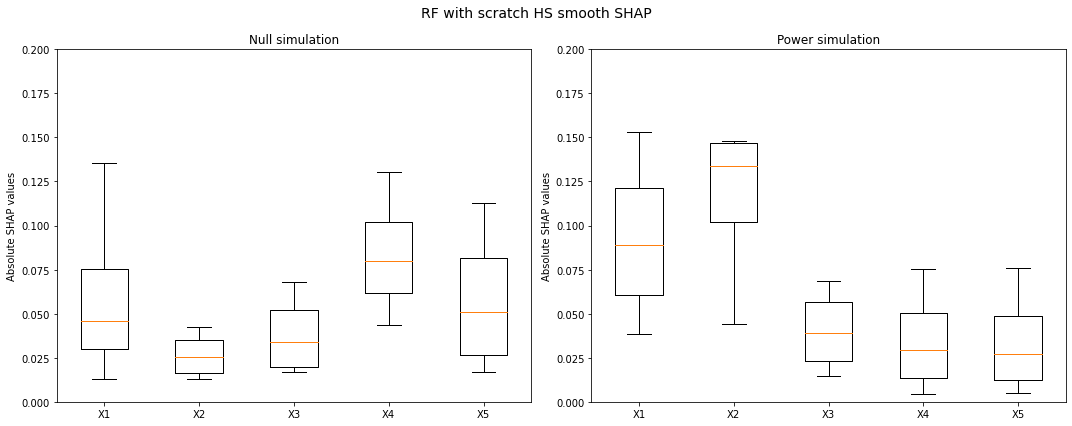

In [56]:
#Null simulation
fig, axs = plt.subplots(1,2, figsize=(15,6))
x_label = ["X1", "X2", "X3", "X4", "X5"]

fig.suptitle('RF with scratch HS smooth SHAP', fontsize=14)

axs[0].boxplot(np.abs(np.array(shap_imps_nullRF[0])).mean(axis=1), labels=x_label)
axs[0].set_title('Null simulation')
axs[0].set_ylabel("Absolute SHAP values")

axs[1].boxplot(np.abs(np.array(shap_imps_powerRF[1])).mean(axis=1), labels=x_label)
axs[1].set_title('Power simulation')
axs[1].set_ylabel("Absolute SHAP values")

plt.setp(axs, ylim=[0,0.2]) #set global ylim for all suplots

fig.tight_layout();

# Titanic dataset

In [112]:
from sklearn.datasets import fetch_openml
 
# load dataset
data = fetch_openml('titanic', version=1)["frame"]
data.drop(['name', 'boat', 'body', 'home.dest', 'cabin', 'embarked', 'sibsp', 'parch', 'ticket', 'fare'], axis=1, inplace=True)
data = data.reset_index()
data.rename(columns={"index":"pid"}, inplace=True)
data = data[data["age"].notnull()]
data["sex"] = pd.get_dummies(data["sex"])["female"]

In [114]:
X = data[['pid', 'pclass', 'sex', 'age']]
y = data["survived"].astype("float")

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [116]:
from sklearn.metrics import accuracy_score

### HS with SmoothSHAP incl. GridSearch 

In [120]:
clf_HSsmSHAP = RandomForest(n_trees= 100, treetype="classification", 
                    HShrinkage=False, oob=True, HS_smSHAP=True, oob_SHAP=True, 
                    random_state=None)

In [121]:
grid = {"HS_lambda":[0.1, 1, 10, 20, 50, 100]}

In [122]:
clf_HSsmSHAP_cvresults = GridSearchCV_scratch(estimator=clf_HSsmSHAP, grid=grid, X=X_train, 
    y=y_train, cv=3, scoring_func=accuracy_score)

In [125]:
clf_HSsmSHAP_cvresults

{'best_param_comb': (100,),
 'best_test_score': 0.8387978142076503,
 'mean_test_scores': array([0.80191257, 0.80327869, 0.82377049, 0.81967213, 0.82240437,
        0.83879781]),
 'param_combinations': [(0.1,), (1,), (10,), (20,), (50,), (100,)],
 'cv_scores_p_split': array([[0.79918033, 0.79918033, 0.80737705],
        [0.81557377, 0.77459016, 0.81967213],
        [0.80327869, 0.81557377, 0.85245902],
        [0.8442623 , 0.79918033, 0.81557377],
        [0.81147541, 0.81557377, 0.84016393],
        [0.80327869, 0.8647541 , 0.84836066]])}

In [126]:
clf_HSsmSHAP.HS_lambda

100

In [138]:
[node.id for node in clf_HSsmSHAP.trees[0].node_list if node.feature_name =="pid"][0]

5

In [139]:
clf_HSsmSHAP.trees[0].node_id_dict[5]

{'node': <TreeModelsFromScratch.DecisionTree.Node at 0x7fab34376ef0>,
 'id': 5,
 'depth': 5,
 'feature': 'pid',
 'is_leaf_node': False,
 'threshold': 50.5,
 'gini': 0.4672796106003245,
 'samples': 43,
 'value': 0,
 'value_distribution': [16, 27],
 'prob_distribution': [0.5318913282311102, 0.46810867176888976]}

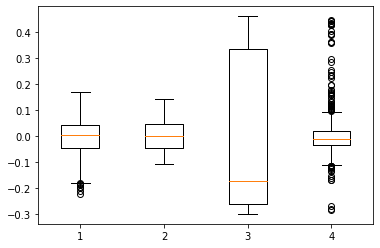

In [162]:
plt.boxplot(clf_HSsmSHAP.smSHAP_vals);

In [142]:
clf_HSsmSHAP.smSHAP_coefs

[0.5556030011873505, 0.8417773074860381, 0.99566737651571, 0.7308930142080764]

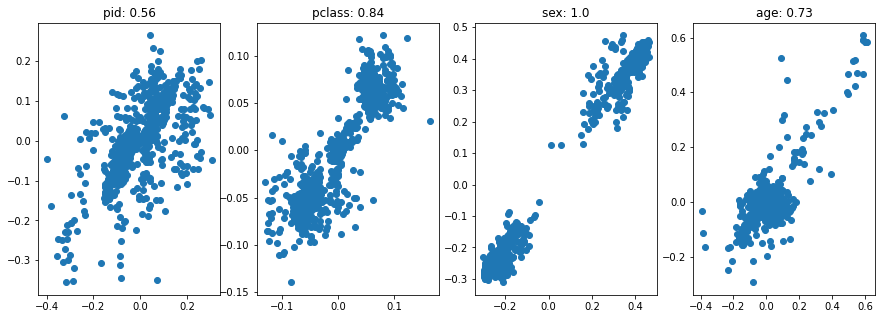

In [158]:
fig, axs = plt.subplots(1,4, figsize=(15,5))

for i in range(4):
    axs[i].scatter(clf_HSsmSHAP.inbag_SHAP_values[:, i].reshape(-1, 1), clf_HSsmSHAP.oob_SHAP_values[:, i])
    axs[i].set_title(f"{clf_HSsmSHAP.feature_names[i]}: {np.round(clf_HSsmSHAP.smSHAP_coefs[i],2)}")

In [163]:
smooth_shap_vals, mean_smooth_shap, lin_coefs = smooth_shap(clf_HSsmSHAP.inbag_SHAP_values, clf_HSsmSHAP.oob_SHAP_values)

In [164]:
np.array_equal(smooth_shap_vals, clf_HSsmSHAP.smSHAP_vals)

True

In [165]:
mean_smooth_shap

array([0.05346294, 0.04507621, 0.27678744, 0.04997179])

In [177]:
export_model_rfHSsmSH = clf_HSsmSHAP.export_forest_for_SHAP()

#import model into shap tree explainer
explainer_rfHSsmSH = shap.TreeExplainer(export_model_rfHSsmSH)

# Compute shap scores of RF for train data
shap_vals_rfHSsmSH_raw = explainer_rfHSsmSH.shap_values(X_train, y_train)

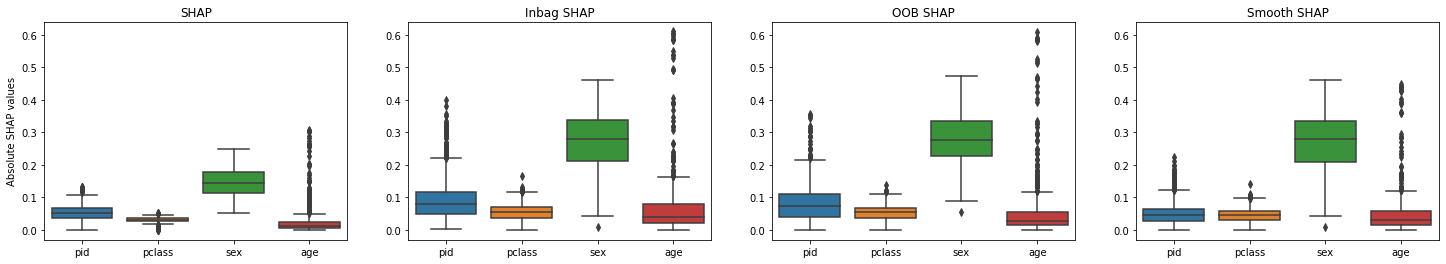

In [183]:
# Comparison of absolute value distribution p feature
fig, axs = plt.subplots(1,4,figsize=(25,4))


sns.boxplot(data=np.abs(shap_vals_rfHSsmSH_raw), ax =axs[0])
sns.boxplot(data=np.abs(clf_HSsmSHAP.inbag_SHAP_values), ax=axs[1])
sns.boxplot(data=np.abs(clf_HSsmSHAP.oob_SHAP_values), ax=axs[2])
sns.boxplot(data=np.abs(clf_HSsmSHAP.smSHAP_vals), ax =axs[3])


axs[0].set_title("SHAP")
axs[1].set_title("Inbag SHAP")
axs[2].set_title("OOB SHAP")
axs[3].set_title("Smooth SHAP")
axs[0].set_ylabel("Absolute SHAP values")

plt.setp(axs, xticks=[0, 1, 2, 3], xticklabels=X_train.columns);

plt.setp(axs, ylim=axs[2].get_ylim());

### HS incl. GridSearch 

In [127]:
clf_HS = RandomForest(n_trees= 100, treetype="classification", 
                    HShrinkage=True, oob=False, HS_smSHAP=False, oob_SHAP=False, 
                    random_state=None)

In [128]:
clf_HS_cvresults = GridSearchCV_scratch(estimator=clf_HS, grid=grid, X=X_train, 
    y=y_train, cv=3, scoring_func=accuracy_score)

In [129]:
clf_HS_cvresults

{'best_param_comb': (20,),
 'best_test_score': 0.842896174863388,
 'mean_test_scores': array([0.81830601, 0.81830601, 0.81967213, 0.84289617, 0.82103825,
        0.83060109]),
 'param_combinations': [(0.1,), (1,), (10,), (20,), (50,), (100,)],
 'cv_scores_p_split': array([[0.83196721, 0.81967213, 0.80327869],
        [0.82786885, 0.80737705, 0.81967213],
        [0.81557377, 0.80327869, 0.84016393],
        [0.82377049, 0.8647541 , 0.84016393],
        [0.83196721, 0.80737705, 0.82377049],
        [0.82786885, 0.83196721, 0.83196721]])}

In [140]:
[node.id for node in clf_HS.trees[0].node_list if node.feature_name =="pid"][0]

6

In [141]:
clf_HS.trees[0].node_id_dict[6]

{'node': <TreeModelsFromScratch.DecisionTree.Node at 0x7fab0b9b6d30>,
 'id': 6,
 'depth': 4,
 'feature': 'pid',
 'is_leaf_node': False,
 'threshold': 686.5,
 'gini': 0.4444444444444444,
 'samples': 3,
 'value': 1,
 'value_distribution': [2, 1],
 'prob_distribution': [0.32198576171345605, 0.678014238286544]}

#### Regular RF

In [184]:
clf_rf = RandomForest(n_trees= 100, treetype="classification", 
                    HShrinkage=False, oob=True, HS_smSHAP=False, oob_SHAP=True, 
                    random_state=None)
clf_rf.fit(X_train, y_train)

In [186]:
export_model_rf = clf_rf.export_forest_for_SHAP()

#import model into shap tree explainer
explainer_rf = shap.TreeExplainer(export_model_rf)

# Compute shap scores of RF for train data
shap_vals_rf_raw = explainer_rf.shap_values(X_train, y_train)

In [185]:
smooth_shap_vals, mean_smooth_shap, lin_coefs = smooth_shap(clf_rf.inbag_SHAP_values, clf_rf.oob_SHAP_values)

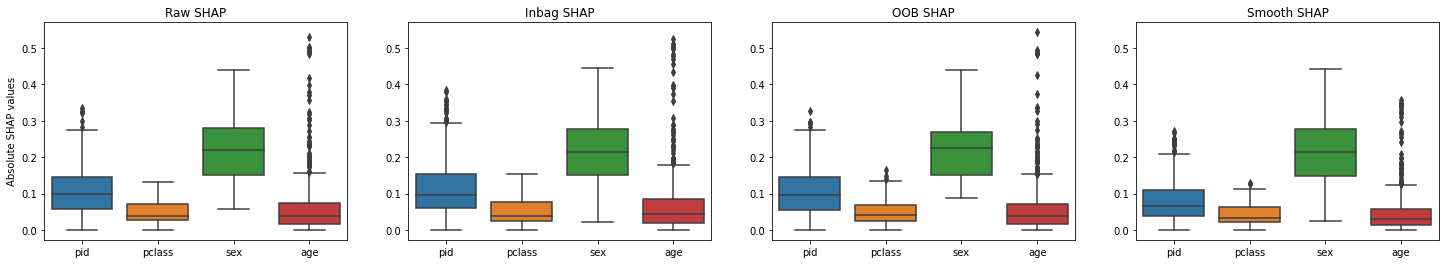

In [201]:
# Comparison of absolute value distribution p feature
fig, axs = plt.subplots(1,4,figsize=(25,4))


sns.boxplot(data=np.abs(shap_vals_rf_raw), ax =axs[0])
sns.boxplot(data=np.abs(clf_rf.inbag_SHAP_values), ax=axs[1])
sns.boxplot(data=np.abs(clf_rf.oob_SHAP_values), ax=axs[2])
sns.boxplot(data=np.abs(smooth_shap_vals), ax =axs[3])


axs[0].set_title("Raw SHAP")
axs[1].set_title("Inbag SHAP")
axs[2].set_title("OOB SHAP")
axs[3].set_title("Smooth SHAP")
axs[0].set_ylabel("Absolute SHAP values")

plt.setp(axs, xticks=[0, 1, 2, 3], xticklabels=X_train.columns);

plt.setp(axs, ylim=axs[2].get_ylim());

Passenger Id gets not shrunk as much as expected!?? 

In [191]:
lin_coefs

[0.6931310137815082,
 0.8213000980957209,
 0.9891466760958815,
 0.6796594932743389]

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
rf_sk = RandomForestClassifier().fit(X_train, y_train)

In [206]:
xplainer_sk =  shap.TreeExplainer(rf_sk)

In [207]:
shap_sk = xplainer_sk.shap_values(X_train)

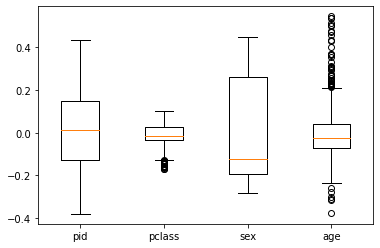

In [214]:
plt.boxplot(shap_sk[1]);

plt.xticks([1, 2, 3, 4], X_train.columns);